In [35]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotnine as gg
from plotnine import *
from sklearn import preprocessing
from bokeh import *
%matplotlib inline

In [36]:
data = pd.read_csv("/Users/habbasi/Desktop/outlier_removed_varselected_combined.csv", encoding= "Latin-1")

# Defining new column based on samples are either Drug and Target Controls, treatments

In [37]:
data['Metadata_datatype'] = None 

data.loc[(data.Metadata_Plate_Map_Name!="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample =="DMSO"), 'Metadata_datatype'] = 'Drug_DMSO'
data.loc[(data.Metadata_Plate_Map_Name!="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample !="DMSO"), 'Metadata_datatype'] = 'Drug_treatments'
data.loc[(data.Metadata_Plate_Map_Name=="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample =="DMSO"), 'Metadata_datatype'] = 'Target_DMSO'
data.loc[(data.Metadata_Plate_Map_Name=="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample !="DMSO"), 'Metadata_datatype'] = 'Target_treatments'


In [38]:
final = data.drop(['X1', 'MD', 'outlier', 'Unnamed: 0'], axis=1)

In [41]:
Metadata = [col for col in final.columns if "Meta" in col]
Variables = [col for col in final.columns if not "Meta" in col]
list(Metadata)

['Metadata_Plate',
 'Metadata_Well',
 'Metadata_Plate_Map_Name',
 'Metadata_broad_sample',
 'Metadata_mg_per_ml',
 'Metadata_mmoles_per_liter',
 'Metadata_solvent',
 'Metadata_pert_id',
 'Metadata_pert_mfc_id',
 'Metadata_pert_well',
 'Metadata_pert_id_vendor',
 'Metadata_cell_id',
 'Metadata_broad_sample_type',
 'Metadata_pert_vehicle',
 'Metadata_pert_type',
 'Metadata_moa',
 'Metadata_pert_name',
 'Metadata_outlier',
 'Metadata_datatype']

In [42]:
import umap.umap_ as umap
reducer=umap.UMAP()

In [43]:
embedding = reducer.fit_transform(final.loc[:, Variables])
embedding.shape


/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


(54143, 2)

In [44]:
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(data.loc[:, Metadata], left_index=True, right_index=True)

In [45]:
combined.head()

,UMAP-1,UMAP-2,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,...,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_outlier,Metadata_datatype
0,-0.117800,1.497764,SQ00015233,A01,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,...,A01,NaN,A549,control,DMSO,control,NaN,NaN,0,Drug_DMSO
1,-1.482284,1.027291,SQ00015233,A02,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,...,A02,NaN,A549,control,DMSO,control,NaN,NaN,0,Drug_DMSO
2,0.128629,1.344703,SQ00015233,A03,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,...,A03,NaN,A549,control,DMSO,control,NaN,NaN,0,Drug_DMSO
3,1.468334,0.906512,SQ00015233,A04,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,...,A04,NaN,A549,control,DMSO,control,NaN,NaN,0,Drug_DMSO
4,-0.180471,1.072113,SQ00015233,A05,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,...,A05,NaN,A549,control,DMSO,control,NaN,NaN,0,Drug_DMSO


In [33]:
test = combined.loc[combined['Metadata_datatype'] == "Drug_DMSO"]
test.head()

,UMAP-1,UMAP-2,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_datatype
0,-1.496436,-2.056718,SQ00015233,A01,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,NaN,A01,NaN,A549,control,DMSO,control,NaN,NaN,Drug_DMSO
1,3.865486,-0.699652,SQ00015233,A02,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,NaN,A02,NaN,A549,control,DMSO,control,NaN,NaN,Drug_DMSO
2,-1.089409,-1.858272,SQ00015233,A03,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,NaN,A03,NaN,A549,control,DMSO,control,NaN,NaN,Drug_DMSO
3,-0.180032,-1.626194,SQ00015233,A04,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,NaN,A04,NaN,A549,control,DMSO,control,NaN,NaN,Drug_DMSO
4,-0.904254,-1.410999,SQ00015233,A05,C-7161-01-LM6-014,DMSO,0.0,0.04,DMSO,NaN,NaN,A05,NaN,A549,control,DMSO,control,NaN,NaN,Drug_DMSO


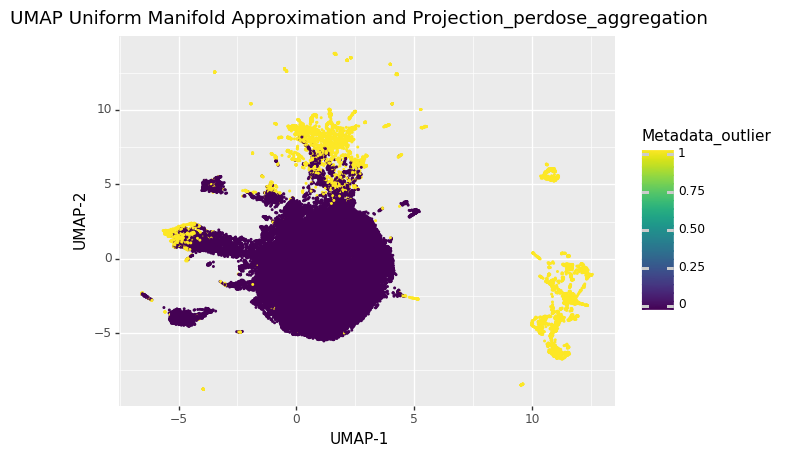

<ggplot: (7558993477)>

In [46]:
p = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_outlier')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection_perdose_aggregation") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

#ggsave(filename='Drug_target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

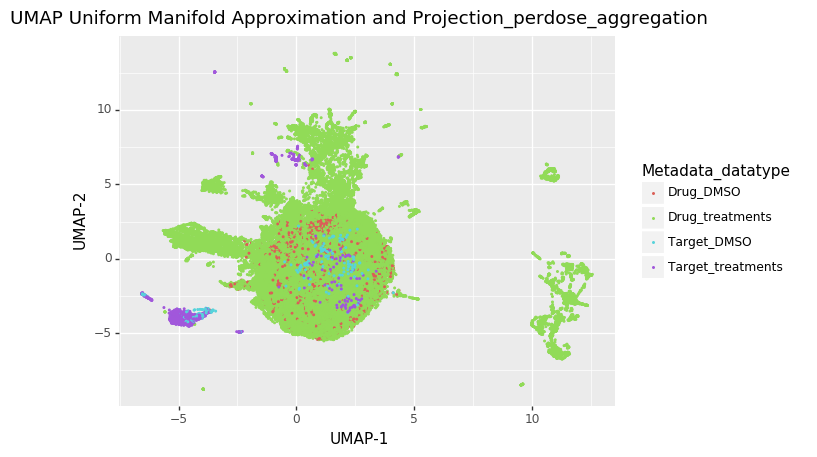

<ggplot: (7559462721)>

In [47]:
p = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_datatype')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection_perdose_aggregation") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

#ggsave(filename='Drug_target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 